In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
# import xgboost as xgb

In [4]:
data= pd.read_csv('realest.csv')
# Drop column 'Condition'
data = data.drop('Condition', axis=1)
data

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5
...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0


<Axes: >

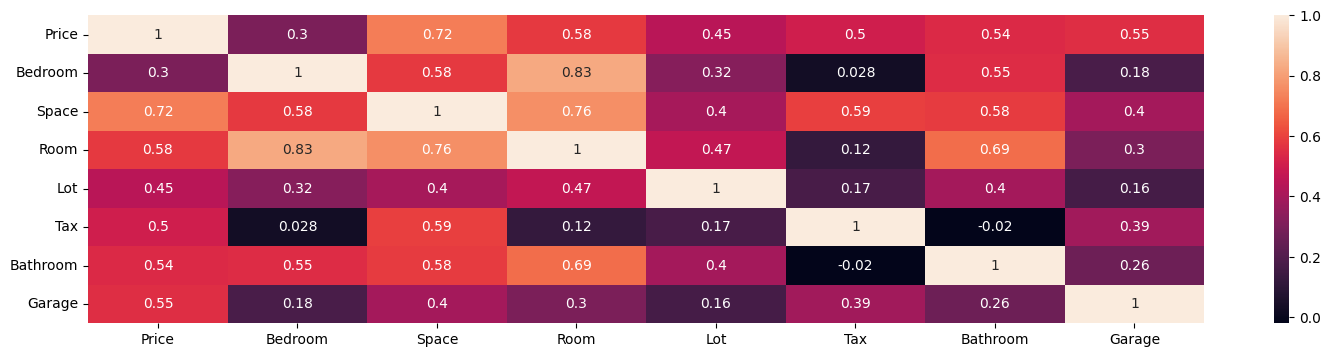

In [5]:
plt.figure(figsize = (18, 4))
sns.heatmap(data.corr(), annot = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     156 non-null    float64
 1   Bedroom   156 non-null    float64
 2   Space     146 non-null    float64
 3   Room      156 non-null    float64
 4   Lot       146 non-null    float64
 5   Tax       147 non-null    float64
 6   Bathroom  156 non-null    float64
 7   Garage    156 non-null    float64
dtypes: float64(8)
memory usage: 9.9 KB


In [7]:
data.isna().sum()

Price        1
Bedroom      1
Space       11
Room         1
Lot         11
Tax         10
Bathroom     1
Garage       1
dtype: int64

In [8]:
for m in data.columns:
    print(m)

Price
Bedroom
Space
Room
Lot
Tax
Bathroom
Garage


In [9]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

print(f'\t\tCategorical Data')
display(cat.head())
print(f'\n\n\t\tNumerical Data')
display(num.head())

		Categorical Data


""
0
1
2
3
4




		Numerical Data


,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5


In [10]:
for m in data.columns:
    if data[m].isnull().sum()/ len(data) * 100 < 30:
        if m in num.columns:
            data[m].fillna(data[m].median(), inplace =True)
        else:
            data[m].fillna(data[m].mode()[0], inplace = True)
    else:
        data.drop(m, axis = 1, inplace = True)

data.isnull().sum()

C:\Users\ajayi\AppData\Local\Temp\ipykernel_23192\2915272689.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[m].fillna(data[m].median(), inplace =True)
C:\Users\ajayi\AppData\Local\Temp\ipykernel_23192\2915272689.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Price       0
Bedroom     0
Space       0
Room        0
Lot         0
Tax         0
Bathroom    0
Garage      0
dtype: int64

In [12]:
# Ensure Data Consistency
data['Price'].unique()

array([53., 55., 56., 58., 64., 44., 49., 70., 72., 82., 85., 45., 47.,
       60., 62., 66., 35., 38., 43., 46., 50., 65., 54., 61., 81., 88.,
       36., 42., 48., 57., 59., 51., 84., 52., 69., 34., 39., 63., 41.,
       71., 73., 80., 67., 90., 68., 37., 32.])

In [13]:
num_data = data.select_dtypes(include = 'number')

def plotter(dataframe, a, b):
    plt.figure(figsize = (15, 3))
    sns.set(style = 'darkgrid')
    plt.subplot(1, 2, 1)
    sns.distplot(data[a])

    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[b])

num_data.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5


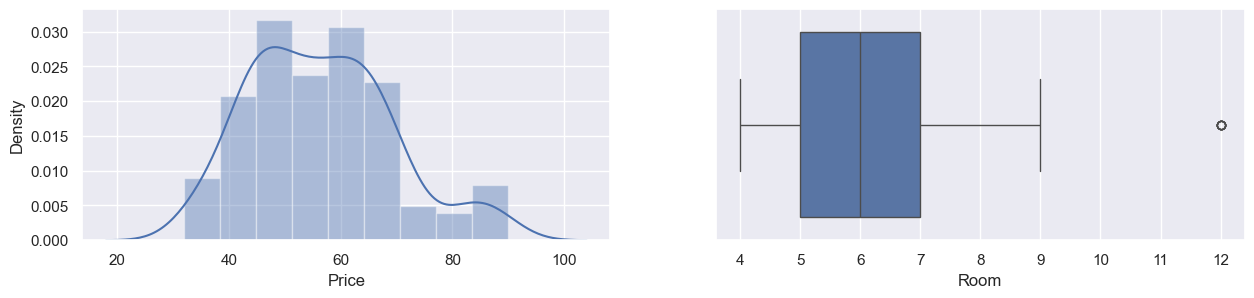

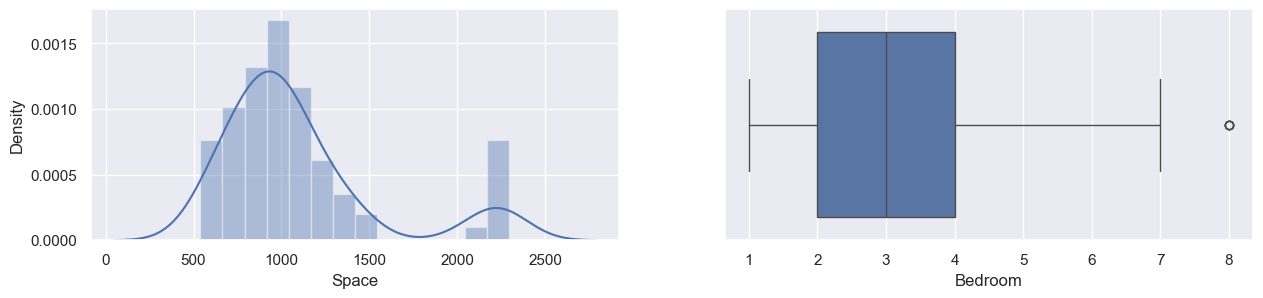

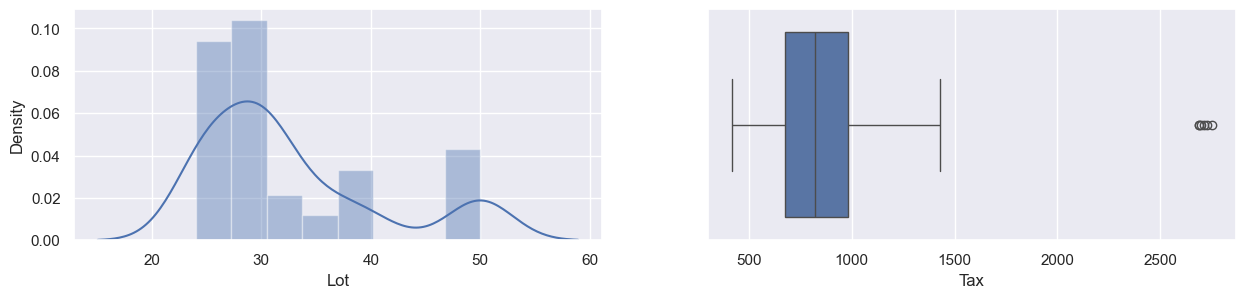

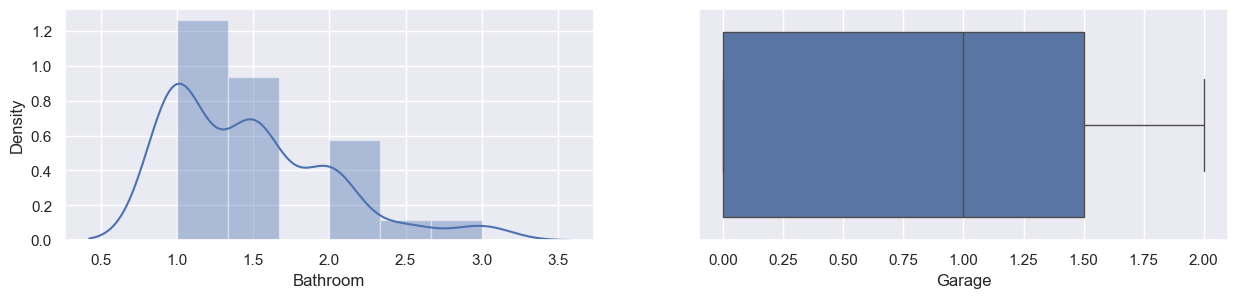

In [14]:
import warnings
warnings.filterwarnings('ignore')
plotter(data, 'Price',	'Room')

plotter(data,'Space','Bedroom' )
plotter(data, 'Lot','Tax')
plotter(data, 'Bathroom','Garage')

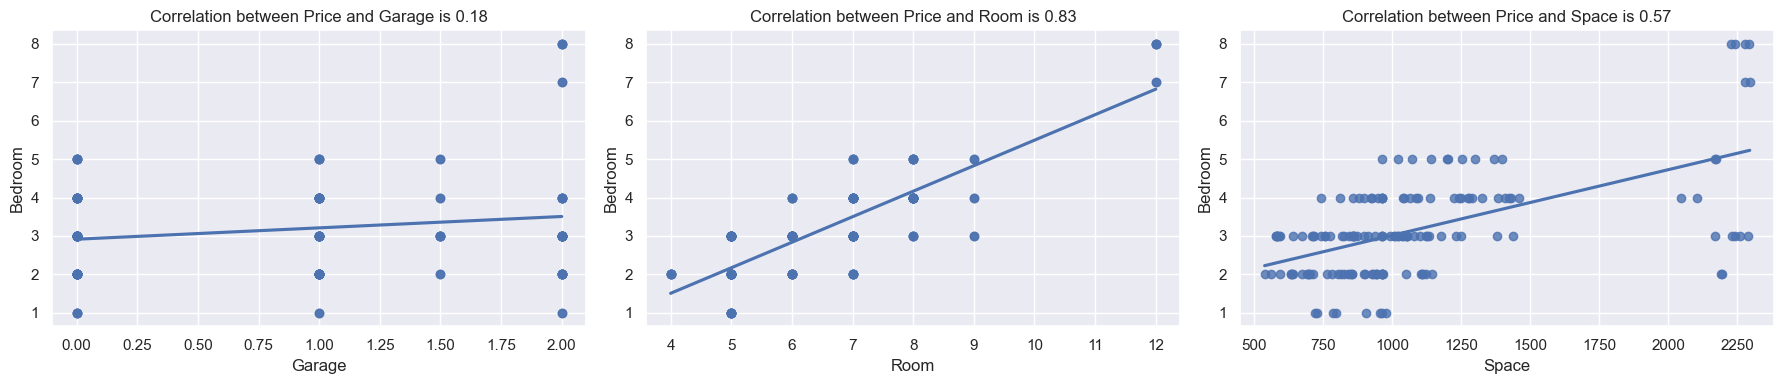

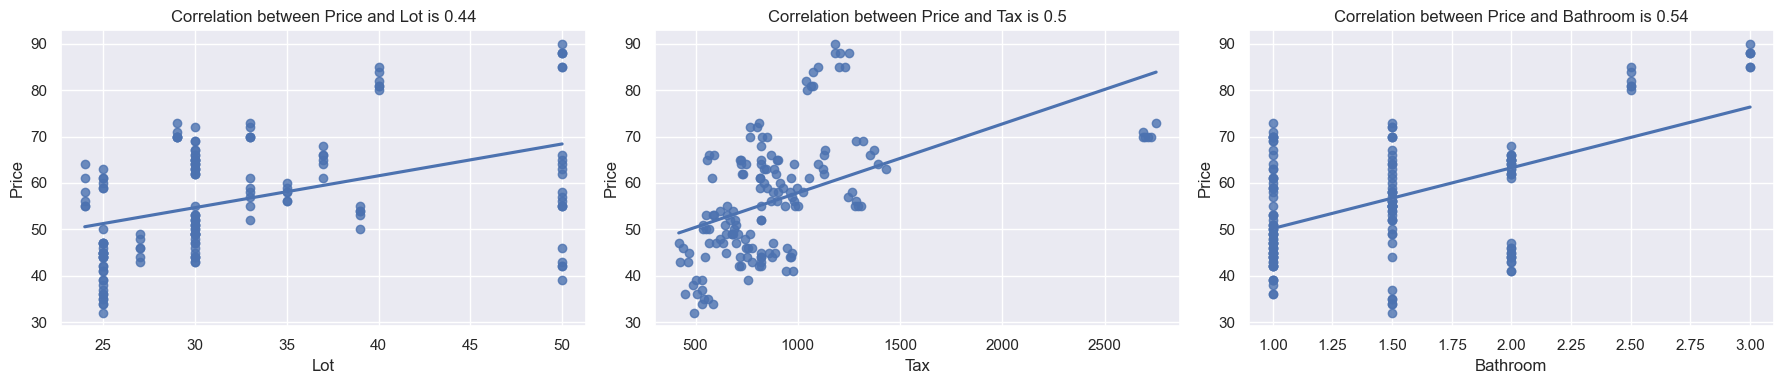

In [15]:
import matplotlib.pyplot as plt

def plotter(data, a, b, c, dependent):
    plt.figure(figsize=(18, 4))

    # Check data types to exclude non-numeric columns
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

    if a in numeric_cols:
        plt.subplot(1, 3, 1)
        sns.regplot(x=data[a], y=data[dependent], ci=0)
        plt.title(f"Correlation between Price and {a} is {data[dependent].corr(data[a]).round(2)}")

    if b in numeric_cols:
        plt.subplot(1, 3, 2)
        sns.regplot(x=data[b], y=data[dependent], ci=0)
        plt.title(f"Correlation between Price and {b} is {data[dependent].corr(data[b]).round(2)}")

    if c in numeric_cols:
        plt.subplot(1, 3, 3)
        sns.regplot(x=data[c], y=data[dependent], ci=0)
        plt.title(f"Correlation between Price and {c} is {data[dependent].corr(data[c]).round(2)}")

    plt.tight_layout()



# Make sure these columns exist in your DataFrame
plotter(data, 'Garage', 'Room', 'Space', 'Bedroom')
plotter(data,'Lot','Tax','Bathroom','Price')
plt.show()


In [16]:
x = data.drop('Price', axis = 1)
y = data.Price


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=2, random_state=4)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor()

# Train the model
rf_regressor.fit(xtrain, ytrain)
validation = rf_regressor.predict(xtrain)
print(r2_score(validation, ytrain)* 100)

98.78748447413504


In [18]:
pred = rf_regressor.predict(xtest)
print(r2_score(pred, ytest)* 100)

97.01797385620917


In [19]:
# Export the model
import pickle
pickle.dump(rf_regressor, open('realeast.pkl', "wb"))

In [20]:
!python -V


Python 3.11.7
